In [2]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 48.2 MB/s eta 0:00:00


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_decision_forests as tfdf
from sklearn.datasets import load_iris

# Google Course Summary

*   A decision tree is a model composed of a collection of conditions organized hierarchically in the shape of a tree. Conditions fall into various categories:
> 1. An axis-aligned condition involves only a single feature. An oblique condition involves multiple features.
> 2. A binary condition has two possible outcomes. A non-binary condition has more than two possible outcomes.
* Training a decision tree involves searching for the best condition at each node. The splitter routine uses metrics such as information gain or Gini to determine the best condition.
* A decision forest is a mode made of multiple decision trees. The prediction of a decision forest is the aggregation of the predictions of its decision trees.
* A random forest is an ensemble of decision trees in which each decision tree is trained with a specific random noise.
* Bagging is a technique in which each decision tree in the random forest is trained on a different subset of examples.
* Random forests do not require a validation dataset. Instead, most random forests use a technique called out-of-bag-evaluation to evaluate the quality of the model.
* A gradient boosted (decision) tree is a type of decision forest trained through iterative adjustments from input decision trees. A value called shrinkage controls the rate at which a gradient boosted (decision) tree learns and the degree to which it could overfit.

# **Classification** - IRIS Flowers
---
150 examples from 3 balenced (50/50/50) classes

> Features (sepal length, sepal width, petal length, petal width)

> Target Class (Iris setosa, Iris versicolor, or Iris virginica)
---






In [53]:
X, Y = load_iris(return_X_y=True, as_frame=True)
print("Classes are balenced ",Y.value_counts(), sep="\n")

Classes are balenced 
0    50
1    50
2    50
Name: target, dtype: int64


In [54]:
print("Dataset is sorted, target is already categorical")
dataset = X.join(Y)
dataset.head(10)

Dataset is sorted, target is already categorical


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# Data Split

training ~80%, test ~20%

Visually confirming label is distributed within ~0.1 for test and training split

In [80]:
np.random.seed(5)
# Use the ~20% of the examples as the testing set
# and the remaining ~80% of the examples as the training set.
test_indices = np.random.rand(len(dataset)) < 0.2
pd_train_dataset = dataset[~test_indices]
pd_test_dataset = dataset[test_indices]

label = "target"
print("Training examples: ", len(pd_train_dataset))
print(pd_train_dataset[label].value_counts(normalize=True,sort=False))
# >> Training examples: 110

print("\nTesting examples: ", len(pd_test_dataset))
print(pd_test_dataset[label].value_counts(normalize=True,sort=False))
# >> Testing examples: 40

Training examples:  118
0    0.338983
1    0.322034
2    0.338983
Name: target, dtype: float64

Testing examples:  32
0    0.3125
1    0.3750
2    0.3125
Name: target, dtype: float64


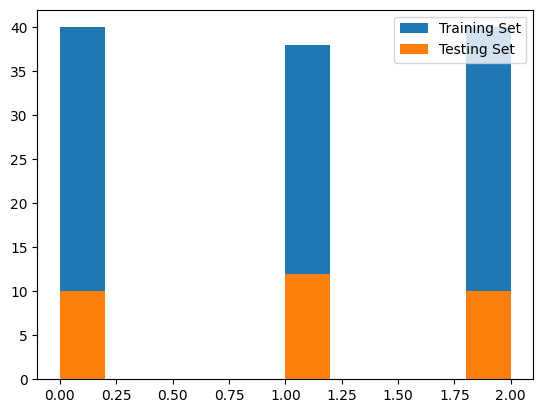

In [81]:
# Create histograms
plt.hist(pd_train_dataset[label], label='Training Set')
plt.hist(pd_test_dataset[label], label='Testing Set')
plt.legend()
plt.show()

# Decision Tree

# Random Forest


# Gradient Boosted Tree